In [83]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [1]:
P= Path("./datasets/")

image_data=[]
labels=[]
image_path=[]

poke_label={"Bulbasaur":0, "Meowth":1, "Pikachu":2}
labeltopoke={ 0:"Bulbasaur",1:"Meowth",2:"Pikachu"}
dirs = P.glob("*")
for folder_path in dirs:
    label= (str(folder_path).split('\\')[-1])
    cnt = 0
    print(label)
    for image_path in folder_path.glob("*.jpg"):
        img = image.load_img(image_path, target_size=(40,40))
        img_array= image.img_to_array(img)
        image_data.append(img_array)
        cnt+=1
        labels.append(poke_label[label])
    print (cnt)
        
print(image_data)
        



NameError: name 'Path' is not defined

## Visualization

445
445
(445, 40, 40, 3)
(445,)


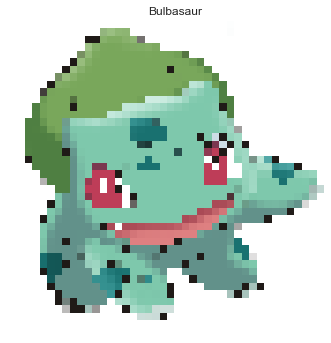

In [92]:
import numpy as np

print(len(image_data))
print(len(labels))

import random
random.seed(10)



X= np.array(image_data)
Y= np.array(labels)

print(X.shape)
print(Y.shape)

def drawimg(img, label):
    plt.title(labeltopoke[label])
    plt.style.use("seaborn")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
drawimg(X[0]/255.0,Y[0])


## Shuffling the dataset

[2 1 2 2 1 0 2 2 0 1 2 1 0 2 2 0 0 2 2 1 0 0 1 1 1 2 2 2 0 2 1 2 0 0 0 2 0
 1 2 2 2 2 1 2 0 2 2 1 2 0 0 2 2 1 2 0 0 2 0 0 2 0 0 2 2 2 0 0 2 0 2 0 2 2
 2 0 2 2 1 0 2 2 0 0 2 0 0 1 2 2 2 2 2 0 2 1 0 0 0 2 0 1 2 1 1 0 1 2 0 2 0
 0 1 0 0 2 2 1 0 2 0 2 0 0 1 2 0 1 0 1 2 1 2 2 0 2 2 2 0 0 2 2 1 2 0 2 2 2
 2 0 2 0 0 2 2 0 2 0 2 2 0 1 0 1 2 0 1 0 1 2 2 0 1 1 0 0 2 2 1 0 0 2 2 0 0
 0 2 2 2 1 2 0 0 2 0 2 0 2 2 2 0 2 0 0 2 2 1 0 2 2 1 0 1 1 0 0 2 1 2 2 0 0
 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 2 0 1 2 1 0 1 2 0 2 2 0 2 0 0 0 2 0 2 2 2 2
 0 0 2 0 0 0 1 0 1 0 2 0 2 0 2 2 1 1 2 2 1 2 0 0 2 2 2 0 0 0 0 2 2 2 1 2 0
 2 2 0 0 2 2 2 1 1 0 2 2 2 2 2 0 0 2 2 2 2 1 2 2 0 1 2 0 2 0 2 0 1 0 0 0 2
 2 1 1 0 1 2 2 2 0 0 2 0 1 2 1 2 0 0 2 0 1 2 1 2 2 2 0 0 0 0 2 2 0 0 0 2 2
 0 2 0 2 0 2 0 0 2 0 0 0 2 2 2 1 0 2 2 2 1 2 0 2 0 1 2 2 0 0 1 0 0 0 0 1 2
 2 1 0 2 2 2 2 0 0 0 2 0 2 2 0 1 0 2 0 0 2 1 2 2 0 1 2 0 2 0 2 2 0 2 0 0 0
 0]
(445, 40, 40, 3)


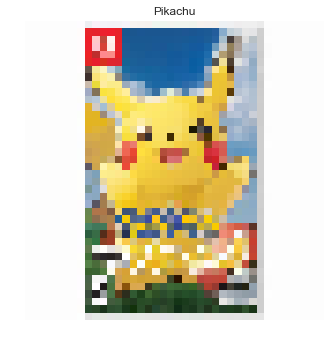

In [93]:



from sklearn.utils import shuffle
X,Y= shuffle(X,Y,random_state=2)
print(Y)
X= X/255.0
print(X.shape) #4800 inputs to the mlp
drawimg(X[0],Y[0])

In [94]:
#create training and testing set
split= int(X.shape[0] *0.8)

print(type(split))

X_= np.array(X)
Y_=np.array(Y)

X= X_[:split, :]
Y= Y_[:split]

Xtest= X_[split:,:]
Ytest= Y_[split:]

print(X.shape,Y.shape)
print(Xtest.shape,Ytest.shape)
print(X_.shape,Y_.shape)



<class 'int'>
(356, 40, 40, 3) (356,)
(89, 40, 40, 3) (89,)
(445, 40, 40, 3) (445,)


# Multilayer-perceptron neural network

In [118]:
#helper function for neural network
def softmax(a):
    ep= np.exp(a)
    denom= np.sum(ep, axis=1, keepdims=True)
    ep= ep/denom
    return ep

In [119]:
class NeuralNetwork:
    
    def __init__(self , input_size, output_size, layer):
        np.random.seed(0)
        
        model= {}
       
        model['w1']= np.random.randn(input_size,layer[0])
        model['b1']= np.zeros((1, layer[0]))
       
        model['w2']= np.random.randn(layer[0],layer[1])
        model['b2']=np.zeros((1, layer[1]))
            
        model['w3']= np.random.randn(layer[1],output_size)
        model['b3']= np.zeros((1, output_size))
            
        self.model= model
    def sample(self):
        return (self.model)
    def forward(self, x):
        w1,w2,w3= self.model['w1'],self.model['w2'], self.model['w3']
        b1, b2, b3= self.model['b1'], self.model['b2'], self.model['b3']
        
        z1= np.dot(x, w1) + b1;
        a1= np.tanh(z1);
        
        z2= np.dot(a1, w2)+ b2;
        a2= np.tanh(z2);
        
        z3= np.dot(a2, w3)+b3;
        y_= softmax(z3);
        
        self.activation_inputs= (a1, a2, y_)
        return y_
        
    def backward(self, x ,y , learning_rate= 0.001):
        w1, w2, w3= self.model['w1'], self.model['w2'], self.model['w3']
        b1, b2, b3= self.model['b1'], self.model['b2'], self.model['b3']
        m = x.shape[0]
        a1, a2, y_= self.activation_inputs
        
        
        delta3= y_- y
        dw3= np.dot(a2.T, delta3)
        db3= np.sum(delta3, axis= 0 )/float(m)
        
        delta2= (1-np.square(a2)) *np.dot(delta3 , w3.T)
        dw2= np.dot(a1.T, delta2)
        db2= np.sum(delta2, axis= 0 )/float(m)
        
        delta1 = (1-np.square(a1))* np.dot(delta2, w2.T)
        dw1= np.dot(x.T, delta1)
        db1= np.sum(delta1, axis=0)/float(m)
        
        self.model['w1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['w2']-= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['w3']-= learning_rate*dw3
        self.model['b3']-= learning_rate*db3
        
    def predict(self,x):
        y_out= self.forward(x)
        return np.argmax(y_out, axis = 1)
    def summary(self ):
        w1, w2, w3= self.model['w1'], self.model['w2'], self.model['w3']
        a1, a2, y_= self.activation_inputs
        
        print("w1", w1.shape)
        print("a1", a1.shape)
        
        print("w2", w2.shape)
        print("a2", a2.shape)
        
        print("w3", w3.shape)
        print("y_", y_.shape)
  

In [120]:
def loss(y_oht, p):
    l = -np.mean(y_oht*np.log(p))
    return l
def ohv(y, depth):
    m= y.shape[0]
    y_oht=  np.zeros((m, depth));
    y_oht[np.arange(m), y]= 1;
    return y_oht;

# Training your model

In [121]:
def train(X,Y, learning_rate, epoch, model, logs= True):
    training_loss=[]
    classes= 3
    y_hot=ohv(Y,classes)
    
    for ix in range(epoch):
        y_= model.forward(X)
        l=loss(y_hot, y_);
        model.backward(X,y_hot,learning_rate)
        training_loss.append(l)
        if((logs) and (epoch%50==0)):
            print("for epoch %d loss is %0.4f"%(ix, l))
    return training_loss

In [122]:
model = NeuralNetwork(input_size= 4800, output_size=3, layer=[100,50])# 4800 inputs(40*40*3)

print(X.shape)
X= X.reshape(X.shape[0],-1)
print(X.shape)

(356, 4800)
(356, 4800)


for epoch 0 loss is 1.7763
for epoch 1 loss is 1.4434
for epoch 2 loss is 1.2850
for epoch 3 loss is 1.2381
for epoch 4 loss is 1.1037
for epoch 5 loss is 1.0073
for epoch 6 loss is 0.9465
for epoch 7 loss is 0.8852
for epoch 8 loss is 0.8831
for epoch 9 loss is 0.8337
for epoch 10 loss is 0.7687
for epoch 11 loss is 0.7432
for epoch 12 loss is 0.6776
for epoch 13 loss is 0.6891
for epoch 14 loss is 0.6252
for epoch 15 loss is 0.5782
for epoch 16 loss is 0.5582
for epoch 17 loss is 0.6187
for epoch 18 loss is 0.6091
for epoch 19 loss is 0.5672
for epoch 20 loss is 0.5313
for epoch 21 loss is 0.5453
for epoch 22 loss is 0.4811
for epoch 23 loss is 0.4857
for epoch 24 loss is 0.4606
for epoch 25 loss is 0.4516
for epoch 26 loss is 0.4355
for epoch 27 loss is 0.4465
for epoch 28 loss is 0.4495
for epoch 29 loss is 0.4267
for epoch 30 loss is 0.3864
for epoch 31 loss is 0.3746
for epoch 32 loss is 0.3782
for epoch 33 loss is 0.3620
for epoch 34 loss is 0.3638
for epoch 35 loss is 0.3552
fo

for epoch 290 loss is 0.0335
for epoch 291 loss is 0.0334
for epoch 292 loss is 0.0333
for epoch 293 loss is 0.0332
for epoch 294 loss is 0.0331
for epoch 295 loss is 0.0330
for epoch 296 loss is 0.0329
for epoch 297 loss is 0.0328
for epoch 298 loss is 0.0328
for epoch 299 loss is 0.0326
for epoch 300 loss is 0.0326
for epoch 301 loss is 0.0324
for epoch 302 loss is 0.0324
for epoch 303 loss is 0.0322
for epoch 304 loss is 0.0322
for epoch 305 loss is 0.0321
for epoch 306 loss is 0.0320
for epoch 307 loss is 0.0319
for epoch 308 loss is 0.0319
for epoch 309 loss is 0.0317
for epoch 310 loss is 0.0317
for epoch 311 loss is 0.0315
for epoch 312 loss is 0.0315
for epoch 313 loss is 0.0314
for epoch 314 loss is 0.0313
for epoch 315 loss is 0.0312
for epoch 316 loss is 0.0312
for epoch 317 loss is 0.0310
for epoch 318 loss is 0.0310
for epoch 319 loss is 0.0309
for epoch 320 loss is 0.0308
for epoch 321 loss is 0.0307
for epoch 322 loss is 0.0307
for epoch 323 loss is 0.0306
for epoch 324 

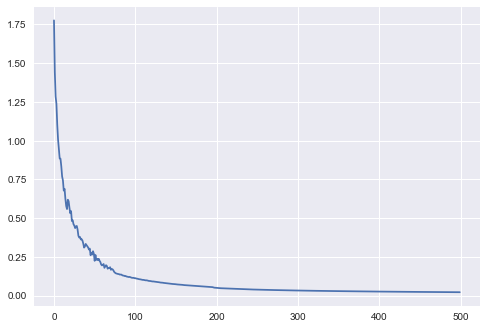

In [123]:
training_loss=train(X,Y,0.0002,500,model) 


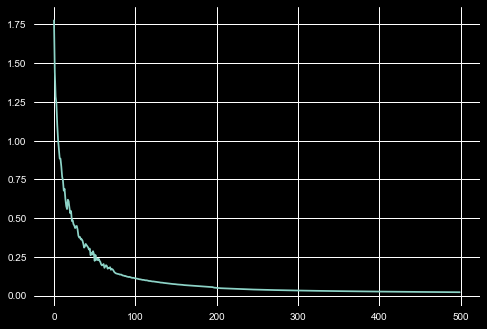

training accuracy is 99.4382


In [127]:
plt.style.use("dark_background")
plt.plot(training_loss)

plt.show()

result = model.predict(X)
accuracy_percentage=((np.sum(result ==Y))/Y.shape[0])*100
print("training accuracy is %0.4f"%(accuracy_percentage))


In [135]:
Xtest= Xtest.reshape(Xtest.shape[0],-1)
result = model.predict(Xtest)
accuracy_percentage=((np.sum(result ==Ytest))/Ytest.shape[0])*100
print("testing accuracy is %0.4f"%(accuracy_percentage))

testing accuracy is 74.1573


# visualize mis-classifications

In [138]:
from sklearn.metrics import classification_report
outputs= model.predict(X)
print(classification_report(outputs, Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       0.98      0.98      0.98        61
           2       0.99      0.99      0.99       160

   micro avg       0.99      0.99      0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356



Confusion matrix, without normalization
[[135   0   0]
 [  0  60   1]
 [  0   1 159]]


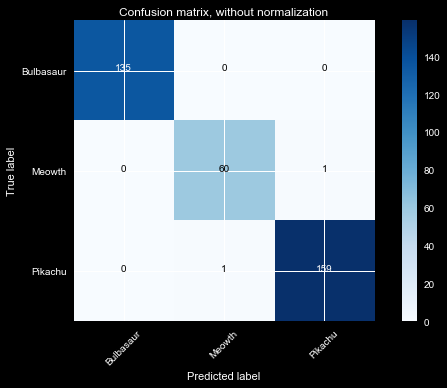

In [141]:
from sklearn.metrics import confusion_matrix
import itertools
import operator

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(outputs, Y)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bulbasaur','Meowth','Pikachu'],
                      title='Confusion matrix, without normalization')

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.44      0.33      0.38        12
           2       0.79      0.74      0.77        42

   micro avg       0.74      0.74      0.74        89
   macro avg       0.67      0.65      0.65        89
weighted avg       0.73      0.74      0.73        89

Confusion matrix, without normalization
[[31  1  3]
 [ 3  4  5]
 [ 7  4 31]]


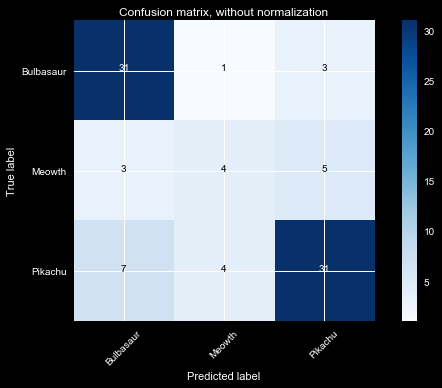

In [143]:
outputs= model.predict(Xtest)
print(classification_report(outputs, Ytest))

cnf_matrix = confusion_matrix(outputs, Ytest)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Bulbasaur','Meowth','Pikachu'],
                      title='Confusion matrix, without normalization')